In [1]:
# ===============================
# Linear Regression with sklearn
# ===============================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib


In [2]:
# -----------------------------------------------------------
# 1. Load Example Dataset (California Housing from sklearn)
# -----------------------------------------------------------
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedianHouseValue")

print("Dataset shape:", X.shape)

Dataset shape: (20640, 8)


In [3]:

# -----------------------------------------------------------
# 2. Train-Test Split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:

# -----------------------------------------------------------
# 3. Train Linear Regression Model
# -----------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Completed.")


Model Training Completed.


In [5]:
# -----------------------------------------------------------
# 4. Predictions
# -----------------------------------------------------------
y_pred = model.predict(X_test)

In [6]:

# -----------------------------------------------------------
# 5. Evaluation Metrics
# -----------------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"MSE : {mse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R² Score : {r2:.4f}")


--- Model Evaluation ---
MSE : 0.5559
MAE : 0.5332
R² Score : 0.5758


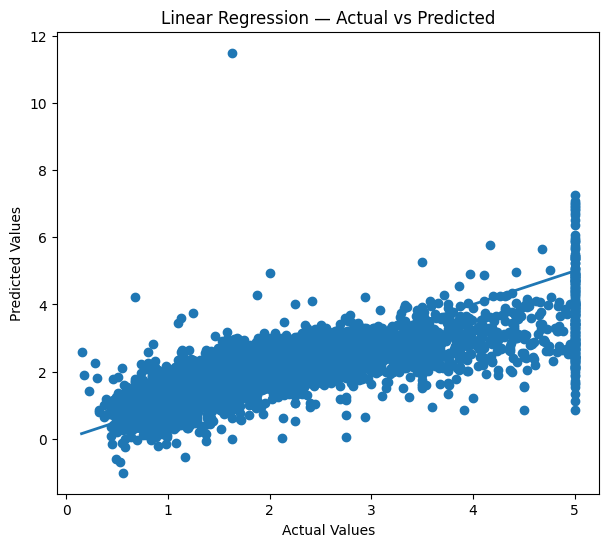

In [7]:
# -----------------------------------------------------------
# 6. Plot (Actual vs Predicted)
# -----------------------------------------------------------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linewidth=2
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression — Actual vs Predicted")
plt.show()

In [8]:
# -----------------------------------------------------------
# 7. Save Model
# -----------------------------------------------------------
joblib.dump(model, "linear_regression_model.pkl")
print("\nModel saved as linear_regression_model.pkl")


Model saved as linear_regression_model.pkl


In [9]:

# -----------------------------------------------------------
# 8. (Optional) View Coefficients
# -----------------------------------------------------------
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\n--- Feature Coefficients ---")
print(coeff_df)



--- Feature Coefficients ---
      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708
